URL of notebook 

https://www.kaggle.com/code/hidetaketakahashi/cancerdetection-cnn2/notebook

In [1]:
import numpy as np 
import pandas as pd 

import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import cv2
from sklearn import metrics
import gc

In [2]:
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [3]:
sample_df = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/sample_submission.csv")
label_df = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/train_labels.csv")

In [4]:
fpath = "/kaggle/input/cancerdetection-npy/X_test.npy"
X_test = np.load(fpath)


In [5]:

fpath = "/kaggle/input/cancerdetection-npy/X_val.npy"
X_val = np.load(fpath)

fpath = "/kaggle/input/cancerdetection-npy/y_val.npy"
y_val = np.load(fpath)

In [6]:
fpath = "/kaggle/input/cancerdetection-npy/X_train.npy"
X_train = np.load(fpath)[0:100000]

fpath = "/kaggle/input/cancerdetection-npy/y_train.npy"
y_train = np.load(fpath)[0:100000]

In [7]:
gc.collect()

37

In [8]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((100000, 96, 96, 3),
 (10000, 96, 96, 3),
 (100000, 1),
 (10000, 1),
 (57458, 96, 96, 3))

In [9]:
X_shape = X_train[0].shape
X_shape

(96, 96, 3)

In [10]:
tf.keras.utils.set_random_seed(
    seed = 2
)

model = models.Sequential()

NF =64
FS = 3

model.add(layers.Rescaling(scale=1./127.5, offset=-1., input_shape = X_shape))
model.add(layers.RandomFlip(mode="horizontal_and_vertical", seed=1, input_shape = X_shape))

model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same", input_shape = X_shape))
model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same"))
model.add(layers.MaxPooling2D((2,2)))


FS = 3
NF = NF*2
model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same"))
model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same"))
model.add(layers.MaxPooling2D((2,2)))


FS = 3
NF = NF*2
model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same"))
model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same"))
model.add(layers.MaxPooling2D((2,2)))


FS = 3
NF = NF*2
model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same"))
model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same"))
model.add(layers.MaxPooling2D((2,2)))

FS = 3
NF = NF
model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same"))
model.add(layers.Conv2D(NF, (FS,FS), activation = "LeakyReLU", padding = "same"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5, seed = 1))
model.add(layers.Dense(512*9, activation = "relu"))

model.add(layers.Dense(2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 96, 96, 3)         0         
                                                                 
 random_flip (RandomFlip)    (None, 96, 96, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       73856     
                                                        

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
model.compile(
    #optimizer=Optimizer, 
    optimizer = "adam",
    loss=loss_fn, 
    metrics=['accuracy'] 
    #metrics=[tf.keras.metrics.AUC()]
    )

In [13]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 7, validation_data = (X_val, y_val))

Epoch 1/7
782/782 [==============================] - 154s 181ms/step - loss: 2.2901 - accuracy: 0.7015 - val_loss: 0.4744 - val_accuracy: 0.7799
Epoch 2/7
782/782 [==============================] - 140s 180ms/step - loss: 0.4226 - accuracy: 0.8107 - val_loss: 0.3782 - val_accuracy: 0.8459
Epoch 3/7
782/782 [==============================] - 141s 180ms/step - loss: 0.3641 - accuracy: 0.8430 - val_loss: 0.3549 - val_accuracy: 0.8362
Epoch 4/7
782/782 [==============================] - 139s 178ms/step - loss: 0.3257 - accuracy: 0.8619 - val_loss: 0.3116 - val_accuracy: 0.8616
Epoch 5/7
782/782 [==============================] - 139s 178ms/step - loss: 0.2989 - accuracy: 0.8754 - val_loss: 0.3111 - val_accuracy: 0.8697
Epoch 6/7
782/782 [==============================] - 141s 180ms/step - loss: 0.2687 - accuracy: 0.8912 - val_loss: 0.2589 - val_accuracy: 0.8932
Epoch 7/7
782/782 [==============================] - 140s 180ms/step - loss: 0.2358 - accuracy: 0.9066 - val_loss: 0.2412 - val_ac

In [14]:
gc.collect()
tf.keras.backend.clear_session()

In [15]:
del X_train
#del X_val

In [16]:
gc.collect()

42

In [17]:
model.save("CNN_simple")

In [18]:
def plot_scores(history):
    
    fig, ax = plt.subplots(1,2, figsize = (12, 5))
    ax[0].plot(history.history["accuracy"], label = "train")
    ax[0].plot(history.history["val_accuracy"], label = "val")
    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("accuracy")
    ax[0].set_ylim([0.7,1])
    ax[0].set_title("Accuracy")
    ax[0].legend()

    ax[1].plot(history.history["loss"], label = "train")
    ax[1].plot(history.history["val_loss"], label = "val")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("loss")
    ax[1].set_ylim([0,1])
    ax[1].set_title("Loss")
    ax[1].legend()
    
    plt.show()

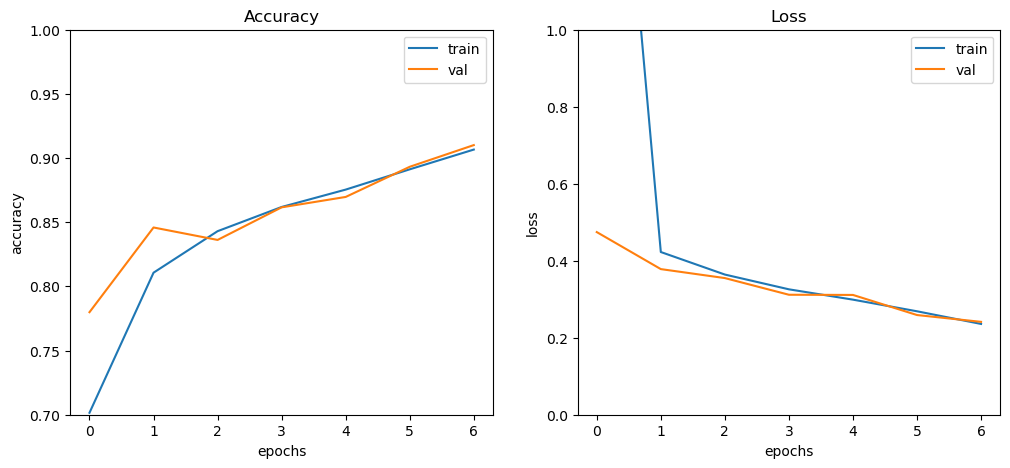

In [19]:
plot_scores(history)

In [20]:
def pred_val():
    
    yhat_test1 = model.predict(X_val)
    yhat_test1 = tf.nn.softmax(yhat_test1).numpy()[:,1]
    
    gc.collect()

    yhat_test2 = model.predict(X_val[:,::-1,::-1,:])
    yhat_test2 = tf.nn.softmax(yhat_test2).numpy()[:,1]
    
    gc.collect()

    yhat_test3 = model.predict(X_val[:,::-1,:,:])
    yhat_test3 = tf.nn.softmax(yhat_test3).numpy()[:,1]
    
    gc.collect()

    yhat_test4 = model.predict(X_val[:,:,::-1,:])
    yhat_test4 = tf.nn.softmax(yhat_test4).numpy()[:,1]
    
    gc.collect()
    
    yhat_test =  (yhat_test1 + yhat_test2 + yhat_test3 + yhat_test4)/4
    
    return yhat_test

In [21]:
def pred_test():
    
    yhat_test1 = model.predict(X_test)
    yhat_test1 = tf.nn.softmax(yhat_test1).numpy()[:,1]
    
    gc.collect()
    tf.keras.backend.clear_session()
    
    yhat_test2 = model.predict(X_test[:,::-1,::-1,:])
    yhat_test2 = tf.nn.softmax(yhat_test2).numpy()[:,1]
    
    gc.collect()
    tf.keras.backend.clear_session()

    yhat_test3 = model.predict(X_test[:,::-1,:,:])
    yhat_test3 = tf.nn.softmax(yhat_test3).numpy()[:,1]
    
    gc.collect()
    tf.keras.backend.clear_session()

    yhat_test4 = model.predict(X_test[:,:,::-1,:])
    yhat_test4 = tf.nn.softmax(yhat_test4).numpy()[:,1]
    
    gc.collect()
    tf.keras.backend.clear_session()
    
    yhat_test =  (yhat_test1 + yhat_test2 + yhat_test3 + yhat_test4)/4
    
    return yhat_test

In [22]:
yhat_test = pred_test()
np.min(yhat_test), np.max(yhat_test), np.mean(yhat_test)

1796/1796 [==============================] - 25s 14ms/step


(2.8666373e-05, 1.0, 0.39416045)

In [23]:
test_submit = sample_df.copy()
test_submit["label"] = yhat_test
test_submit.to_csv('submission.csv',index=False)
test_submit["label"].mean()

0.39416045

<AxesSubplot:>

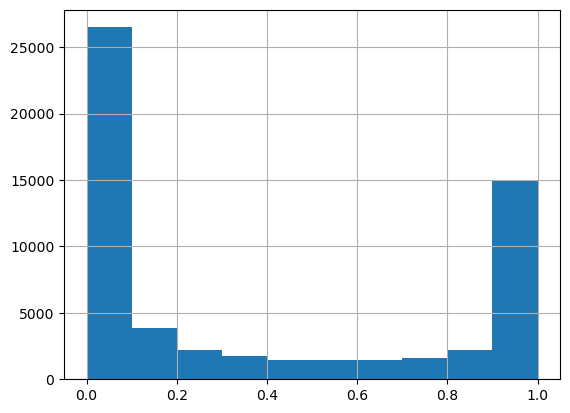

In [24]:
test_submit["label"].hist()

In [25]:
yhat_val = model.predict(X_val)
yhat_val = tf.nn.softmax(yhat_val).numpy()[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_val, yhat_val, pos_label=1)
val_auc = metrics.auc(fpr, tpr)
print("val auc", val_auc)

313/313 [==============================] - 5s 14ms/step
val auc 0.9642357348749514


In [26]:
yhat_val = pred_val()
fpr, tpr, thresholds = metrics.roc_curve(y_val, yhat_val, pos_label=1)
val_auc = metrics.auc(fpr, tpr)
print("val auc", val_auc)

313/313 [==============================] - 4s 14ms/step
val auc 0.9682920348788997


In [27]:
yhat_val_n = (yhat_val > 0.5).astype(int)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_val, yhat_val_n)

array([[4705,  338],
       [ 477, 4480]])